# Without feature selection 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 

In [2]:
df = pd.read_csv("c:/users/HP/Dropbox/Breast Cancer ML Project/breast-cancer-wisconsin-data/data.csv")
cancer_df = df.copy()    # CREATING A COPY OF THE ORIGINAL DATAFRAME
print("Shape of the data : " , cancer_df.shape )
cancer_df.head(5 )

Shape of the data :  (569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
# extracting information about the features / attributes 

cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [4]:
# we have only 1 categorical feature 

cancer_df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

# B stands for benign while M stands for Malignant
# Total benign cells are 357 , total Malignant cells are 212 

# Little bit of preprocessing 

In [5]:
cancer_df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
# last attribute  'Unnamed : 32' contains only NAN . so we can get rid of this attribute

# we don't need id attribute also .

# we can extract output variable y , which is diagnosis  , from this data as well . 

y = cancer_df.diagnosis.values 

cancer_df.drop(["Unnamed: 32" , "id", "diagnosis"] , axis = 1 , inplace= True ) 
cancer_df.head(3) 

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [7]:
X = cancer_df.values 

In [8]:
from sklearn.preprocessing import StandardScaler 

In [9]:
scaler = StandardScaler()
scaler.fit(X )
scaled_x = scaler.transform(X) 

In [10]:
scaled_x[:2,:] 

array([[ 1.09706398e+00, -2.07333501e+00,  1.26993369e+00,
         9.84374905e-01,  1.56846633e+00,  3.28351467e+00,
         2.65287398e+00,  2.53247522e+00,  2.21751501e+00,
         2.25574689e+00,  2.48973393e+00, -5.65265059e-01,
         2.83303087e+00,  2.48757756e+00, -2.14001647e-01,
         1.31686157e+00,  7.24026158e-01,  6.60819941e-01,
         1.14875667e+00,  9.07083081e-01,  1.88668963e+00,
        -1.35929347e+00,  2.30360062e+00,  2.00123749e+00,
         1.30768627e+00,  2.61666502e+00,  2.10952635e+00,
         2.29607613e+00,  2.75062224e+00,  1.93701461e+00],
       [ 1.82982061e+00, -3.53632408e-01,  1.68595471e+00,
         1.90870825e+00, -8.26962447e-01, -4.87071673e-01,
        -2.38458552e-02,  5.48144156e-01,  1.39236330e-03,
        -8.68652457e-01,  4.99254601e-01, -8.76243603e-01,
         2.63326966e-01,  7.42401948e-01, -6.05350847e-01,
        -6.92926270e-01, -4.40780058e-01,  2.60162067e-01,
        -8.05450380e-01, -9.94437403e-02,  1.80592744e+

In [11]:
# Done with the preprocessing

# Train test and split 

In [12]:
from sklearn.model_selection import train_test_split 
X_train , X_test , y_train , y_test = train_test_split (scaled_x , y , test_size = 0.33 , random_state = 4 )

In [13]:
test = []
accuracy = []

# Logistic Regression 

In [14]:
from sklearn.linear_model import LogisticRegression 
logic_model = LogisticRegression(solver = "liblinear")

In [15]:
logic_model.fit(X_train , y_train ) 
y_pred = logic_model.predict(X_test ) 

# Evaluation metrics 

In [16]:
from sklearn.metrics import classification_report , accuracy_score , f1_score , jaccard_similarity_score , confusion_matrix 

In [17]:
print ("classification Report : " , classification_report(y_test ,y_pred ) ,  sep = "\n")
print( "Confusion Matrix : " , confusion_matrix(y_test , y_pred ) , sep = "\n" , end = "\n\n")
print ("jaccard index : " , jaccard_similarity_score(y_test , y_pred) , end = "\n\n") 

print ("Accuracy : " , accuracy_score(y_test , y_pred )  * 100 ) 


classification Report : 
              precision    recall  f1-score   support

           B       0.99      0.95      0.97       128
           M       0.91      0.98      0.94        60

   micro avg       0.96      0.96      0.96       188
   macro avg       0.95      0.97      0.96       188
weighted avg       0.97      0.96      0.96       188

Confusion Matrix : 
[[122   6]
 [  1  59]]

jaccard index :  0.9627659574468085

Accuracy :  96.27659574468085


<p style="color : green ; font-size :20px ; font-family : verdana; "> Logistic Regression gives an accuracy of 
<b>96.27 </b> </p>

In [18]:
test.append("Log_reg")
accuracy.append(96.27 ) 

# Decision Tree 

In [19]:
from sklearn.tree import DecisionTreeClassifier 


In [20]:
for depth in range(3, 7 ) : 
    tree_classifier = DecisionTreeClassifier(criterion = "entropy" , max_depth = depth  , random_state = 1 )
    tree_classifier.fit(X_train , y_train )
    y_pred = tree_classifier.predict(X_test )
    print ("Depth value : " , depth )
    print ("Accuracy : " , accuracy_score(y_test, y_pred ) * 100 , end= "\n\n") 

Depth value :  3
Accuracy :  93.08510638297872

Depth value :  4
Accuracy :  92.5531914893617

Depth value :  5
Accuracy :  94.14893617021278

Depth value :  6
Accuracy :  89.36170212765957



<p style = "color : green ; font-size :20px ; fontfamily : verdana " >for depth = 5 , we are getting a max accuracy of <b>94.14</b> </p>

In [21]:

tree_classifier = DecisionTreeClassifier(criterion= "entropy" , max_depth= 5  , random_state= 1 ) 
tree_classifier.fit(X_train , y_train )
y_pred = tree_classifier.predict(X_test )
test.append("Dec_tree")
accuracy.append(94.14) 


# Evaluation Metrics 

In [22]:
print ("Classification Report : " , classification_report(y_test , y_pred), sep = "\n")
print ("Confusion Matrix : " , confusion_matrix(y_test , y_pred ),  sep = "\n", end = "\n\n")
print ("Jaccard Index : ", jaccard_similarity_score(y_test , y_pred ) , end = "\n\n")
print ("Accuracy : " , accuracy_score(y_test , y_pred ) * 100 ) 

Classification Report : 
              precision    recall  f1-score   support

           B       0.97      0.95      0.96       128
           M       0.89      0.93      0.91        60

   micro avg       0.94      0.94      0.94       188
   macro avg       0.93      0.94      0.93       188
weighted avg       0.94      0.94      0.94       188

Confusion Matrix : 
[[121   7]
 [  4  56]]

Jaccard Index :  0.9414893617021277

Accuracy :  94.14893617021278


# KNN 

In [23]:
from sklearn.neighbors import KNeighborsClassifier 

In [24]:
for k in range(2, 15 ) :
    knn_model = KNeighborsClassifier(n_neighbors= k ) 
    knn_model.fit(X_train , y_train ) 
    y_pred = knn_model.predict(X_test )
    print ("K value : " , k ) 
    print ("accuracy : " , accuracy_score(y_test , y_pred )*100 , end = "\n\n") 

K value :  2
accuracy :  97.87234042553192

K value :  3
accuracy :  97.3404255319149

K value :  4
accuracy :  98.40425531914893

K value :  5
accuracy :  96.27659574468085

K value :  6
accuracy :  96.80851063829788

K value :  7
accuracy :  97.3404255319149

K value :  8
accuracy :  98.93617021276596

K value :  9
accuracy :  98.93617021276596

K value :  10
accuracy :  98.93617021276596

K value :  11
accuracy :  98.40425531914893

K value :  12
accuracy :  99.46808510638297

K value :  13
accuracy :  98.93617021276596

K value :  14
accuracy :  98.40425531914893




<p style = "color : green ; font-size :20px ; fontfamily : verdana " >for k = 12 , we're getting a max accuracy of <b>99.46</b> </p>

In [25]:
knn_model = KNeighborsClassifier (n_neighbors = 12 )
knn_model.fit(X_train , y_train )
y_pred = knn_model.predict(X_test)

test.append("KNN")
accuracy.append(99.46) 

# Evaluation Metrics 

In [26]:
print ("Classification Report : " , classification_report(y_test , y_pred), sep = "\n")
print ("Confusion Matrix : " , confusion_matrix(y_test , y_pred ),  sep = "\n", end = "\n\n")
print ("Jaccard Index : ", jaccard_similarity_score(y_test , y_pred ) , end = "\n\n")
print ("Accuracy : " , accuracy_score(y_test , y_pred ) * 100 ) 

Classification Report : 
              precision    recall  f1-score   support

           B       0.99      1.00      1.00       128
           M       1.00      0.98      0.99        60

   micro avg       0.99      0.99      0.99       188
   macro avg       1.00      0.99      0.99       188
weighted avg       0.99      0.99      0.99       188

Confusion Matrix : 
[[128   0]
 [  1  59]]

Jaccard Index :  0.9946808510638298

Accuracy :  99.46808510638297


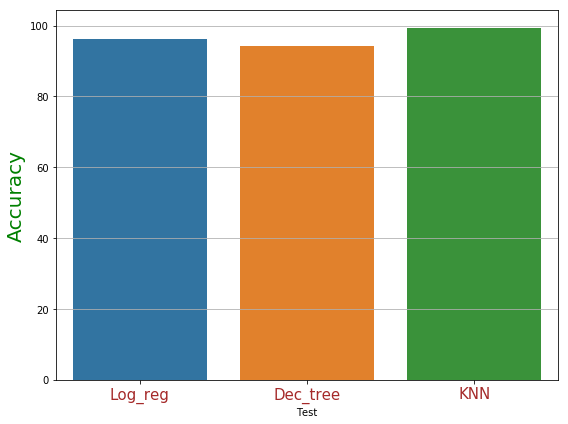

In [27]:
test_accuracy_df = pd.DataFrame({"Test": test , "Accuracy" : accuracy })
# test_accuracy_df
plt.figure(figsize = (8 , 6 ))
plt.grid(True)
sns.barplot(x = "Test" , y = "Accuracy" , data = test_accuracy_df)
plt.xticks(color = "brown" , fontsize = 15 )
plt.ylabel("Accuracy" , color = "green" ,  fontsize = 20)
plt.tight_layout()
plt.savefig("first_ana1.png")
plt.show() 

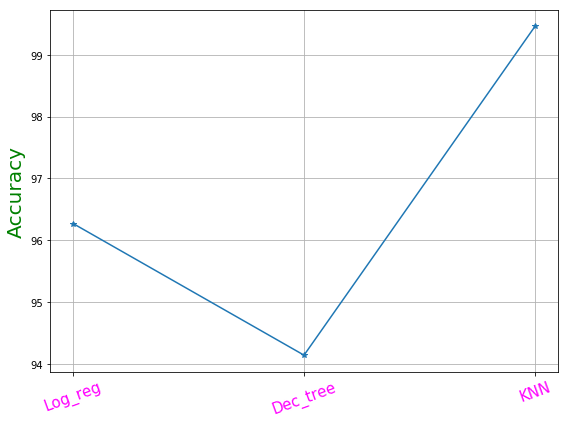

In [28]:
plt.figure(figsize = (8 , 6 ))
plt.grid(True)
plt.plot(test , accuracy , marker = "*")
plt.ylabel("Accuracy" , color = "green" ,  fontsize = 20)
plt.xticks(color = "magenta" , fontsize = 15 , rotation = 20 )
plt.tight_layout()
plt.savefig("first_ana2.png")
plt.show()

# SVM 
which is our main point of interest 

In [29]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV 

In [30]:
kernels = ["linear" , "poly", "rbf" , "sigmoid"] 
C = [1 , 10 ,100 , 1000 ]
gamma = [1 , 0.1 , 0.01 , 0.001 ]
kernel_accuracy = [] 

In [31]:
for kernel in kernels :
    param_grid = {"C" : C , "gamma" : gamma , "kernel" : [kernel]}
    grid = GridSearchCV(estimator = SVC() , param_grid= param_grid ,verbose = 4  )
    grid.fit(X_train , y_train )
    kernel_accuracy.append(round (grid.score(X_test , y_test) * 100 , 2 ) ) 
    

D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ...... C=1, gamma=1, kernel=linear, score=0.984375, total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV]  C=1, gamma=1, kernel=linear, score=0.937007874015748, total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV]  C=1, gamma=1, kernel=linear, score=0.9603174603174603, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] .... C=1, gamma=0.1, kernel=linear, score=0.984375, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV]  C=1, gamma=0.1, kernel=linear, score=0.937007874015748, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV]  C=1, gamma=0.1, kernel=linear, score=0.9603174603174603, total=   0.0s
[CV] C=1, gamma=0.01, kernel=linear .................................

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.3s finished
D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV] .. C=10, gamma=0.001, kernel=poly, score=0.6015625, total=   0.0s
[CV] C=10, gamma=0.001, kernel=poly ..................................
[CV]  C=10, gamma=0.001, kernel=poly, score=0.5984251968503937, total=   0.0s
[CV] C=10, gamma=0.001, kernel=poly ..................................
[CV]  C=10, gamma=0.001, kernel=poly, score=0.6031746031746031, total=   0.0s
[CV] C=100, gamma=1, kernel=poly .....................................
[CV] ...... C=100, gamma=1, kernel=poly, score=0.953125, total=   0.0s
[CV] C=100, gamma=1, kernel=poly .....................................
[CV]  C=100, gamma=1, kernel=poly, score=0.937007874015748, total=   0.0s
[CV] C=100, gamma=1, kernel=poly .....................................
[CV]  C=100, gamma=1, kernel=poly, score=0.9365079365079365, total=   0.0s
[CV] C=100, gamma=0.1, kernel=poly ...................................
[CV] .... C=100, gamma=0.1, kernel=poly, score=0.953125, total=   0.0s
[CV] C=100, gamma=0.1, kernel=poly .....................

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.3s finished
D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=10, gamma=1, kernel=rbf, score=0.5984251968503937, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV]  C=10, gamma=1, kernel=rbf, score=0.6031746031746031, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ..... C=10, gamma=0.1, kernel=rbf, score=0.9296875, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV]  C=10, gamma=0.1, kernel=rbf, score=0.9448818897637795, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV]  C=10, gamma=0.1, kernel=rbf, score=0.9523809523809523, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] .... C=10, gamma=0.01, kernel=rbf, score=0.9765625, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV]  C=10, gamma=0.01, kernel=rbf, score=0.968503937007874, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ...........................

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.5s finished
D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV] ........ C=1, gamma=1, kernel=sigmoid, score=0.875, total=   0.0s
[CV] C=1, gamma=1, kernel=sigmoid ....................................
[CV]  C=1, gamma=1, kernel=sigmoid, score=0.889763779527559, total=   0.0s
[CV] C=1, gamma=1, kernel=sigmoid ....................................
[CV]  C=1, gamma=1, kernel=sigmoid, score=0.8968253968253969, total=   0.0s
[CV] C=1, gamma=0.1, kernel=sigmoid ..................................
[CV] ..... C=1, gamma=0.1, kernel=sigmoid, score=0.9375, total=   0.0s
[CV] C=1, gamma=0.1, kernel=sigmoid ..................................
[CV]  C=1, gamma=0.1, kernel=sigmoid, score=0.9291338582677166, total=   0.0s
[CV] C=1, gamma=0.1, kernel=sigmoid ..................................
[CV]  C=1, gamma=0.1, kernel=sigmoid, score=0.9365079365079365, total=   0.0s
[CV] C=1, gamma=0.01, kernel=sigmoid .................................
[CV] . C=1, gamma=0.01, kernel=sigmoid, score=0.9609375, total=   0.0s
[CV] C=1, gamma=0.01, kernel=sigmoid .................

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.3s finished


In [32]:
kernel_df = pd.DataFrame({"kernel_name" : kernels , "Accuracies" : kernel_accuracy}) 
kernel_df

,kernel_name,Accuracies
0,linear,96.28
1,poly,95.21
2,rbf,99.47
3,sigmoid,97.87


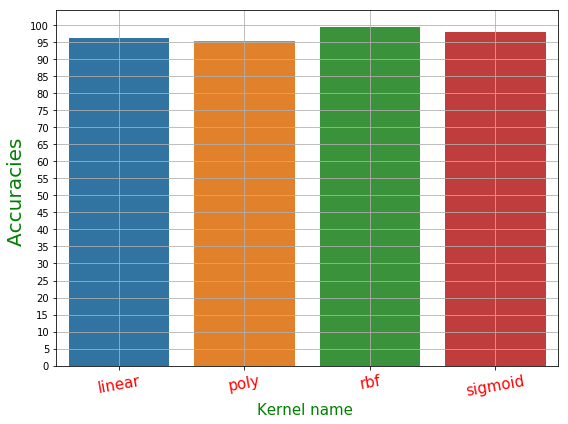

In [33]:
plt.figure(figsize = (8 , 6 ))
sns.barplot(x = "kernel_name" , y = "Accuracies" , data= kernel_df )
plt.grid(True)
plt.xlabel("Kernel name ", color = "green" , fontsize = 15  ) 
plt.ylabel("Accuracies ", color = "green" , fontsize = 20  ) 
plt.yticks(ticks = np.arange(0 ,105, 5 ) ,labels = np.arange(0 ,105 , 5 ))
plt.xticks(color = "red" , rotation = 10 , fontsize = 15 )
plt.tight_layout()
plt.savefig("first_ana3.png")
plt.show()

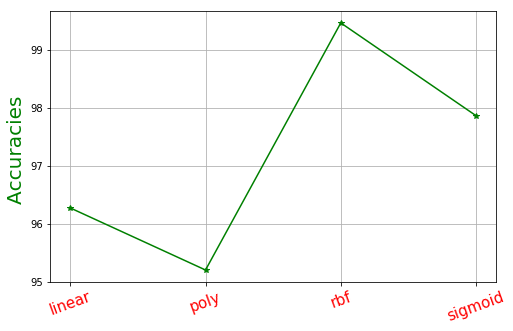

In [34]:
plt.figure(figsize = (8  ,5))
plt.plot(kernels,  kernel_accuracy , marker = "*" , color = "green" )
plt.grid(True)
plt.xticks(color = "red" , rotation = 20 , fontsize = 15 )
plt.ylabel("Accuracies ", color = "green" , fontsize = 20  )
# plt.tight_layout()
plt.savefig("first_ana4.png")
plt.show() 